# Linear Regression
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-fundations)
    1. [Linear Regression Model Prediction](#linear-regression-model-prediction)
    2. [MSE Cost Function](#mse-cost-function)
3. [Learning Algorithm](#learning-algorithm)
    1. [Weight Update Rule](#weight-update-rule)
    2. [Define a Linear Regression Class using batch gradient descent](#define-a-linear-regression-class-using-batch-gradient-descent)
    3. [Showcase the above LinearRegressionGD Class in California Housing dataset](#showcase-the-above-linearregressiongd-class-in-california-housing-dataset)
    4. [Use class provided by Scikit-Learn](#use-class-provided-by-scikit-learn)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)

    
    



## Introduction
Linear regression, a statistical method introduced by French mathematician Adrien-Marie Legendre in 1805 and later by German mathematician Carl Friedrich Gauss, models the relationship between a dependent variable and one or more independent variables. With a history dating back to the early 19th century, this method has been extensively studied and applied in various fields such as statistics, economics, and machine learning. As one of the simplest and most widely used machine learning algorithms, linear regression is particularly useful for regression tasks.

## Mathematical Fundations

### Linear Regression Model Prediction
The goal of linear regression is to find the best-fitting line (or hyperplane, in the case of multiple independent variables) that minimizes the sum of squared errors between the observed values and the predicted values. The Linear Regression model prediction in its vectorized form is given by:

$$
\hat{y} = h_{\theta}(\mathbf{x}) = \theta^{T} \cdot \mathbf{x}
$$

Where:

- $\hat{y}$ is the predicted value.
- $h_{\theta}(\mathbf{x})$ is the hypothesis function, using the model parameters $\theta$.
- $\theta^{T}$ is the transpose of the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta^{T} \cdot \mathbf{x}$ is the dot product of the vectors $\theta^{T}$ and $\mathbf{x}$, which is of course equal to $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$.


### MSE Cost Function
The Mean Squared Error (MSE) cost function for a Linear Regression model is given by:

$$
J(\theta) = MSE(X, h_θ) = \frac{1}{m} \sum_{i=1}^{m} (θ^{T}x^{(i)} - y^{(i)})^2
$$
Where:

- $θ$ is the model's parameter vector.
- $x^{(i)}$ is the $i^{th}$ instance's feature vector.
- $y^{(i)}$ is the $i^{th}$ instance's target value.
- $h_θ$ is the hypothesis function, using the model parameters $θ$.
- $m$ is the number of instances in the dataset.



## Learning Algorithm

The learning algorithm for linear regression aims to find the optimal weights that minimize the sum of squared errors. There are several methods for doing this, including:

1. **Ordinary Least Squares (OLS)**: A closed-form solution that directly computes the weights by solving a system of linear equations. The Normal Equation for solving Linear Regression using the Ordinary Least Squares (OLS) method is:

    $$
    \hat{\theta} = (X^{T}X)^{-1}X^{T}y
    $$
    Where:

    - $\hat{\theta}$ is the value of θ that minimizes the cost function.
    - $X$ is the design matrix containing our features (each row corresponds to a data point, each column corresponds to a feature).
    - $X^{T}$ is the transpose of the design matrix.
    - $y$ is the vector of target values.
    - $(X^{T}X)^{-1}$ is the inverse of the matrix $X^{T}X$.


2. **Gradient Descent**: An iterative optimization algorithm that adjusts the weights incrementally to minimize the cost function. Please refer to the [Gradient Descent](../optimization_algorithm/gradient_descent.ipynb) notebook for more details.
3. **Regularization methods (e.g., Lasso, Ridge, Elastic Net)**: Methods that add a penalty term to the cost function to reduce overfitting and improve generalization.

### Weight Update Rule
We use `gradient descent` to update the parameters of our model. 
The weights in Gradient Descent are updated iteratively using the rule:

$$
\theta_{j} := \theta_{j} - \eta \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

Where:
- ":=" symbol means that the weights are updated in-place.
- $\theta_{j}$ is the $j^{th}$ model parameter (or weight).
- $\eta$ is the learning rate.
- $J(\theta)$ is the cost function.
- $\frac{\partial}{\partial \theta_{j}} J(\theta)$ is the partial derivative of the cost function with respect to the $j^{th}$ weight, also known as the gradient of the cost function at $\theta_{j}$.

    The partial derivative of the MSE cost function with respect to the $j^{th}$ model parameter (or weight) is given by:

    $$
    \frac{\partial}{\partial \theta_{j}} J(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^{T} \cdot \mathbf{x}^{(i)} - y^{(i)})x_{j}^{(i)}
    $$

    Where:

    - $m$ is the number of instances in the dataset.
    - $\mathbf{x}^{(i)}$ is the $i^{th}$ instance's feature vector.
    - $y^{(i)}$ is the $i^{th}$ instance's target value.
    - $\theta^{T} \cdot \mathbf{x}^{(i)}$ is the prediction of the model for the $i^{th}$ instance.
    - $x_{j}^{(i)}$ is the $j^{th}$ feature value of the $i^{th}$ instance.

    This formula calculates how much the cost function will change if you change $\theta_{j}$ a little bit. This is why it's used in the weight update rule for Gradient Descent.


In other words, to update each weight, we subtract the product of the learning rate and the gradient of the cost function with respect to that weight.

This update rule is applied once for Batch Gradient Descent, once per mini-batch for Mini-batch Gradient Descent, and once per instance for Stochastic Gradient Descent.

The main reasons we use Gradient Descent instead of the Normal Equation are:

1. **Efficiency:** Gradient Descent is often more efficient for problems with many parameters, as in the case of many machine learning algorithms. For instance, in Linear Regression, the Normal Equation needs to compute the inverse of $(X^{T}X)$, which is an $n \times n$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{3})$, which can be quite slow if the number of features is large. On the other hand, the Gradient Descent algorithm's complexity is roughly $O(n)$, which is much faster for large numbers of features.

2. **Scalability:** Unlike the Normal Equation, Gradient Descent can handle very large datasets. This is because Gradient Descent only requires a single instance (in Stochastic Gradient Descent) or a batch of instances (in Mini-batch Gradient Descent) to make a step, whereas the Normal Equation needs the whole training set to compute $(X^{T}X)$.

3. **Flexibility:** Gradient Descent can be used to optimize a wide range of cost functions, not just Mean Squared Error (MSE), which makes it more versatile for different machine learning models.

The main challenge with Gradient Descent is that it requires careful tuning of the learning rate hyperparameter and the number of iterations. If the learning rate is too high, the algorithm might overshoot the optimal solution and diverge; if it's too low, the algorithm will converge slowly.

### Define a Linear Regression Class using batch gradient descent


In [100]:
# Import necessary libraries and modules
import numpy as np


# Define a class for performing linear regression using gradient descent
class LinearRegressionGD:
    """Perform linear regression using gradient descent.

    Parameters
    ----------
    learning_rate : float, optional (default=0.01)
        The learning rate used in gradient descent.
    epochs : int, optional (default=1000)
        The number of epochs (iterations) to perform gradient descent.

    Attributes
    ----------
    weights : ndarray, shape (n_features,)
        The learned weights of the linear regression model.
    bias : float
        The learned bias of the linear regression model.
    mse : list
        A list of the mean squared error (MSE) for each epoch during training.

    Methods
    -------
    mean_squared_error(y_true, y_pred)
        Calculate the mean squared error (MSE) between the true and predicted target values.
    fit(X, y)
        Fit the linear regression model to the input data X and target values y.
    predict(X)
        Make predictions on new input data X using the learned weights and bias.
    """
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialize the learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs
        # Initialize the weights to None
        self.weights = None
        self.bias = None
        self.mse = []

    def mean_squared_error(self, y_true, y_pred):
        """Calculate the mean squared error (MSE) between the true and predicted target values.

        Parameters
        ----------
        y_true : ndarray, shape (n_samples,)
            The true target values.
        y_pred : ndarray, shape (n_samples,)
            The predicted target values.

        Returns
        -------
        mse : float
            The mean squared error (MSE) between the true and predicted target values.
        """
        # Calculate the mean squared error (MSE) between the true and predicted target values
        mse = np.mean((y_true - y_pred) ** 2)
        return mse
    
    def fit(self, X, y):
        """Fit the linear regression model to the input data X and target values y.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input data to fit the linear regression model to.
        y : ndarray, shape (n_samples,)
            The target values to fit the linear regression model to.

        Returns
        -------
        self : LinearRegressionGD
            The fitted LinearRegressionGD object.
        """
        # Get the number of samples and features in the data
        n_samples, n_features = X.shape
        # Initialize the weights to zeros
        self.weights = np.zeros(n_features)
        # self.weights = np.random.randn(n_features)  # Use this line to replace aboveline if you want to initialize the weights randomly
        # Initialize the bias to zero
        self.bias = 0

        # Perform gradient descent for the specified number of epochs
        for _ in range(self.epochs):
            # Make predictions based on the current weights and bias
            y_pred = np.dot(X, self.weights) + self.bias
            # Calculate the gradient of the loss function with respect to the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update the weights and bias based on the gradient and learning rate
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the mean squared error (MSE) for the current epoch
            mse_epoch = mean_squared_error(y, y_pred)
            self.mse.append(mse_epoch)

    def predict(self, X):
        """Make predictions on new input data X using the learned weights and bias.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input data to make predictions on.

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            The predicted target values for the input data X.
        """
        # Make predictions based on the trained weights and bias
        return np.dot(X, self.weights) + self.bias


### Showcase the above LinearRegressionGD Class in California Housing dataset

In [101]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
targets class:  ['MedHouseVal']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


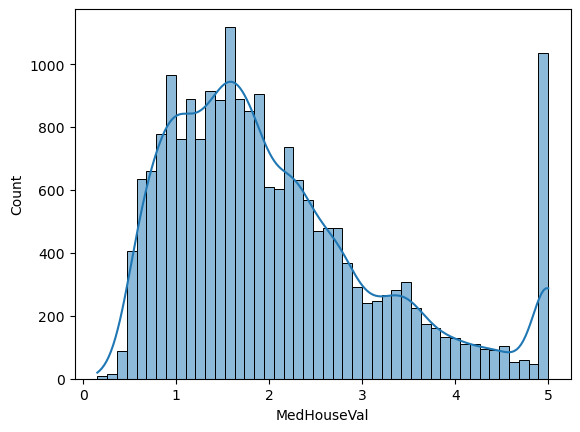

In [102]:
# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target
print("features:" , california.feature_names)
print("targets class: ", california.target_names)
X.info()
# Visualize the distribution of the target variable using a histogram:
sns.histplot(y, kde=True)
plt.show()

MSE: 0.5545776067629031


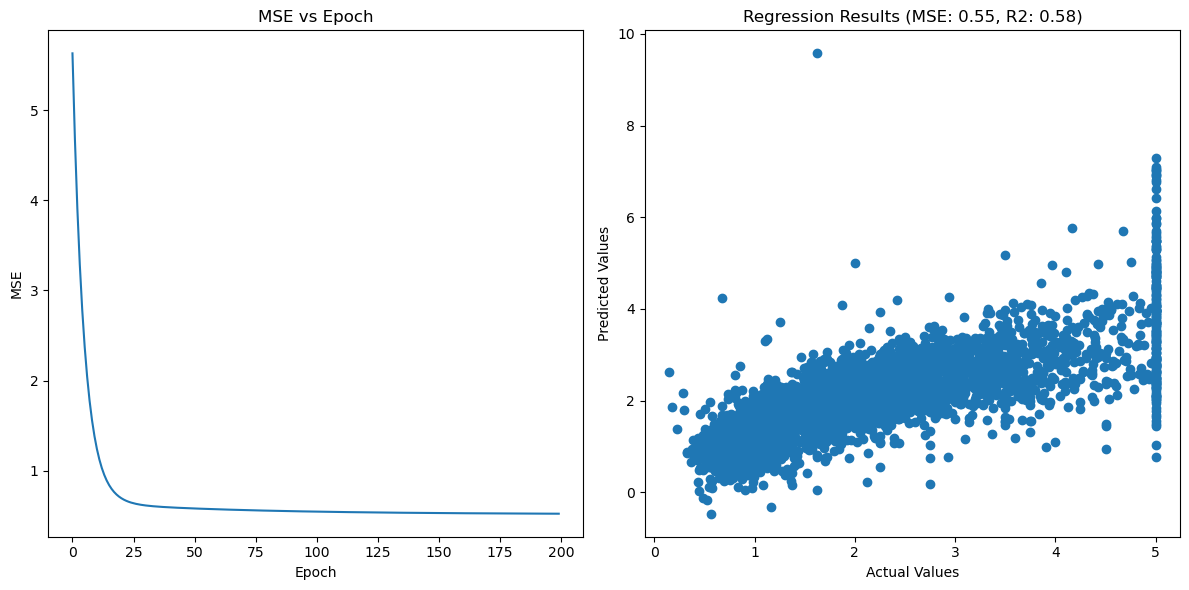

In [103]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LinearRegressionGD object and fit the training data
lr = LinearRegressionGD(learning_rate=0.1, epochs=200)
lr.fit(X_train, y_train)

# Calculate the MSE on the test data
y_pred = lr.predict(X_test)
mse = lr.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the R^2 score on the test data
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = r2_score(y_test, y_pred)


# plot results
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the MSE over the epochs
ax1.plot(range(lr.epochs), lr.mse)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("MSE")
ax1.set_title("MSE vs Epoch")

# Plot the predicted vs actual values on the test data
ax2.scatter(y_test, y_pred)
ax2.set_xlabel("Actual Values")
ax2.set_ylabel("Predicted Values")
ax2.set_title("Regression Results (MSE: {:.2f}, R2: {:.2f})".format(mse, r2))

plt.tight_layout()
plt.show()


The MSE (Mean Squared Error) of 0.55 suggests that on average, the predictions of the linear regression model were off by 0.74 units (since the square root of MSE is RMSE, and RMSE is in the same units as the target variable). This means that the model's predictions have some degree of error and are not perfectly accurate.

The R2 score of 0.58 indicates that the model explains about 58% of the variance in the target variable. This suggests that the model may not be capturing all of the relevant information in the data, as a higher R2 score would indicate that the model is able to explain more of the variance in the target variable.

Overall, these results suggest that the linear regression model may have some limitations in accurately predicting the target variable, and additional features or a more complex model may be needed to improve the accuracy of the predictions.


### Use class provided by Scikit-Learn

The [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function in scikit-learn uses a closed-form solution to calculate the optimal weights directly from the training data.

In [104]:
# Delete previously imported variables
del r2_score,LinearRegressionGD

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object and fit the model to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_new = lin_reg.predict(X_test)

# Calculate the mean squared error (MSE) and coefficient of determination (R^2)
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

# Print the results
print("Mean squared error (MSE): {:.2f}".format(mse_new))
print("Coefficient of determination (R^2): {:.2f}".format(r2_new))


Mean squared error (MSE): 0.56
Coefficient of determination (R^2): 0.58


To use linear regression with gradient descent, we create an [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) object and set the maximum number of iterations (max_iter), the learning rate (eta0). We then fit the model to the training data using gradient descent, make predictions on the testing data, and calculate the mean squared error (MSE) and coefficient of determination (R^2).

In [105]:
# Delete previously imported variables
del y_pred_new, mse_new, r2_new

# Import necessary libraries
from sklearn.linear_model import SGDRegressor

# Create an SGDRegressor object and fit the model to the training data
sgd_reg = SGDRegressor(penalty=None, eta0=0.01, max_iter=1000, random_state=42)
sgd_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_new = sgd_reg.predict(X_test)

# Calculate the mean squared error (MSE) and coefficient of determination (R^2)
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

# Print the results
print("Mean squared error (MSE): {:.2f}".format(mse_new))
print("Coefficient of determination (R^2): {:.2f}".format(r2_new))


Mean squared error (MSE): 0.55
Coefficient of determination (R^2): 0.58


## Pros and Cons

**Pros:**

- Simple and easy to understand.
- Fast to train and predict.
- Works well when the relationship between the dependent and independent variables is linear.

**Cons:**

- Assumes a linear relationship between dependent and independent variables.
- Sensitive to outliers and multicollinearity.
- May not perform well on non-linear or complex data.
- Not suitable for predicting categorical outcomes

## Suitable Tasks and Datasets

Linear regression is a versatile algorithm that can be applied to a wide range of tasks and datasets. Here are some examples:

1. **Predicting Continuous Outcomes:** Since linear regression predicts a continuous output, it is suitable for tasks that require predicting a number. For example, predicting house prices, predicting stock prices, and forecasting sales.

2. **Understanding Relationships:** Linear regression can be used to understand the relationship between the dependent variable and independent variables. It quantifies the strength of the relationship between the variables.

3. **Single Variable Linear Regression:** When there is a single independent variable, linear regression can be used to model the relationship between the dependent and independent variable. For example, predicting a person's weight based on their height.

4. **Multiple Variable Linear Regression:** When there are multiple independent variables, linear regression can model the relationship between the dependent and independent variables. For example, predicting a person's weight based on their height, age, and gender.

5. **Datasets with Linear Relationships:** Linear regression assumes that the relationship between the dependent and independent variables is linear. Therefore, it works best when this assumption is met. 

6. **Large Datasets:** Linear regression can handle large datasets and is computationally efficient compared to some other algorithms.


In brief, linear regression is suitable for tasks and datasets where the relationship between the dependent and independent variables is linear. Some examples include:

- Predicting house prices based on features such as size, location, and age.
- Forecasting sales based on historical data.
- Estimating the effect of marketing campaigns on revenue.

## References

1. Legendre, A. M. (1805). Nouvelles méthodes pour la détermination des orbites des comètes. Courcier.
2. Gauss, C. F. (1809). Theoria motus corporum coelestium in sectionibus conicis solem ambientium. Perthes & Besser.
3. Scikit-Learn: Linear Regression. https://scikit-learn.org/stable/modules/linear_model.html
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
